In [1]:
import numpy as np
from sklearn.datasets import make_classification

In [2]:
X,y  = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                         n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

In [3]:
import matplotlib.pyplot as plt


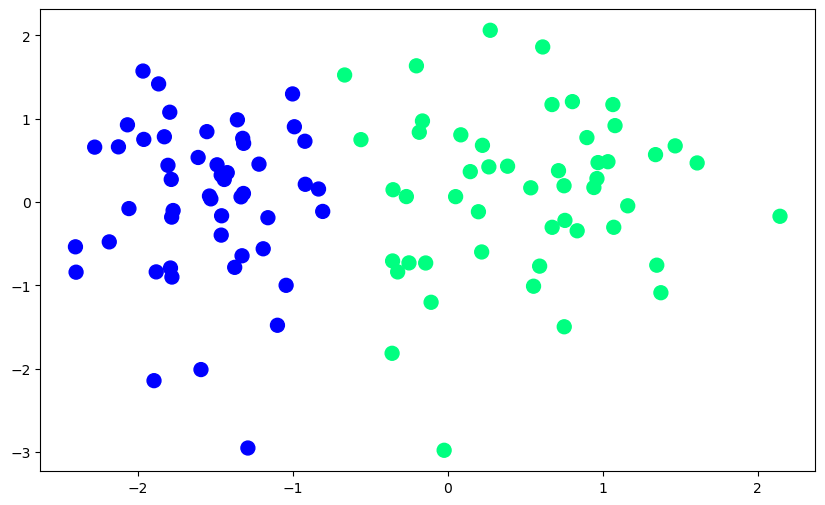

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)

In [5]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]

In [6]:
def step(z):
    return 1 if z>0 else 0

In [7]:
# train model
intercept_,coef_ = perceptron(X, y)

In [8]:
print(coef_)
print(intercept_)

[1.41853527 0.06339945]
0.9


In [9]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [10]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

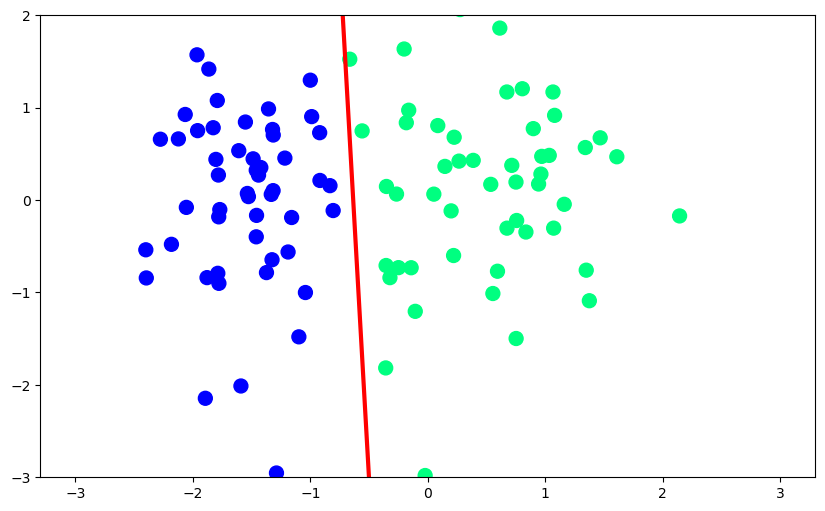

In [11]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color="red",linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)
plt.ylim(-3,2)

In [21]:
def perceptron(X,y):

    m = []
    b = []
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
    return m, b

In [22]:
m,b = perceptron(X,y)

In [23]:
%matplotlib notebook   # enables live animation inside Jupyter

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

UsageError: unrecognized arguments: # enables live animation inside Jupyter


NameError: name 'FuncAnimation' is not defined

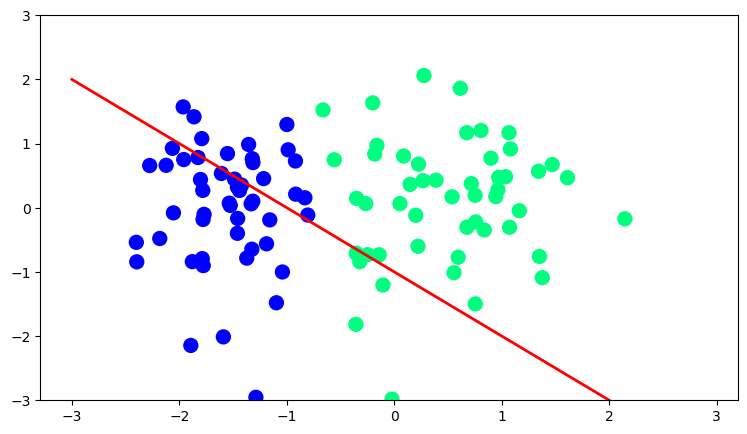

In [20]:
fig, ax  = plt.subplots(figsize=(9,5))

x_i = np.arange(-3,3,0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)
line, = ax.plot(x_i,x_i*m[0] +b[0],"r-",linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = f"epoch {0}".format(i+1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)

anim = FuncAnimation(fig,update,repeat=True,frames=200,interval=100)